In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("../../raw_data/Crimes.csv")

In [3]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
df.drop(columns=["X Coordinate", "Y Coordinate", "Latitude", "Longitude", "Location", "Beat"], inplace=True)

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Updated On
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,1.0,42.0,32.0,11,2015,08/01/2017 03:52:26 PM
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,25.0,36.0,19.0,11,2018,04/06/2019 04:04:43 PM
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,8.0,15.0,63.0,11,2016,04/06/2019 04:04:43 PM
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,17.0,33.0,14.0,08A,2018,04/06/2019 04:04:43 PM
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,22.0,21.0,71.0,11,2014,04/06/2019 04:04:43 PM


# Geo analysis

## (Police) districts (distribution changed in 2012)

In [6]:
df_2_new=df[df.Year > 2012].groupby("District").count()

In [7]:
d_df_new=df_2_new[["ID"]].rename(columns={"ID" : "crime_count" })
#.sort_values(by="crime_count")
#d_df

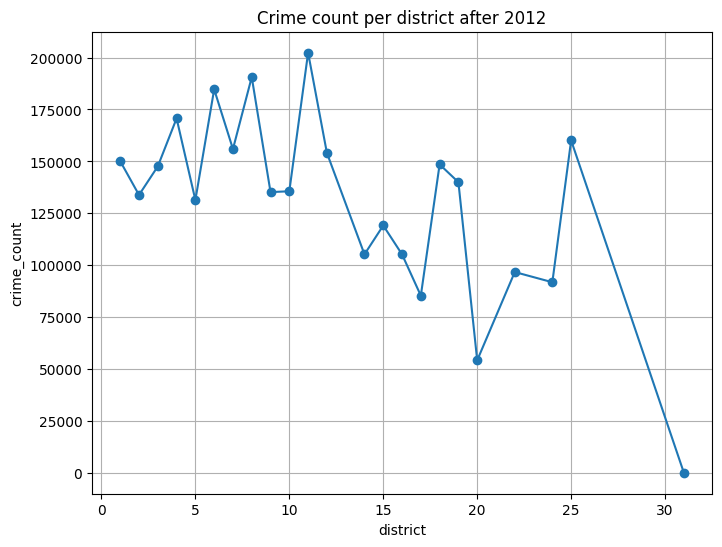

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(d_df_new.index, d_df_new['crime_count'], marker='o')
plt.ylabel('crime_count')
plt.xlabel('district')
plt.title('Crime count per district after 2012')
plt.grid(True)
plt.show()

In [9]:
d_df_new.shape

(23, 1)

### old districts below ...

In [10]:
df_2_old=df[df.Year < 2012].groupby("District").count()

In [11]:
d_df_old=df_2_old[["ID"]].rename(columns={"ID" : "crime_count" })
#.sort_values(by="crime_count")
#d_df

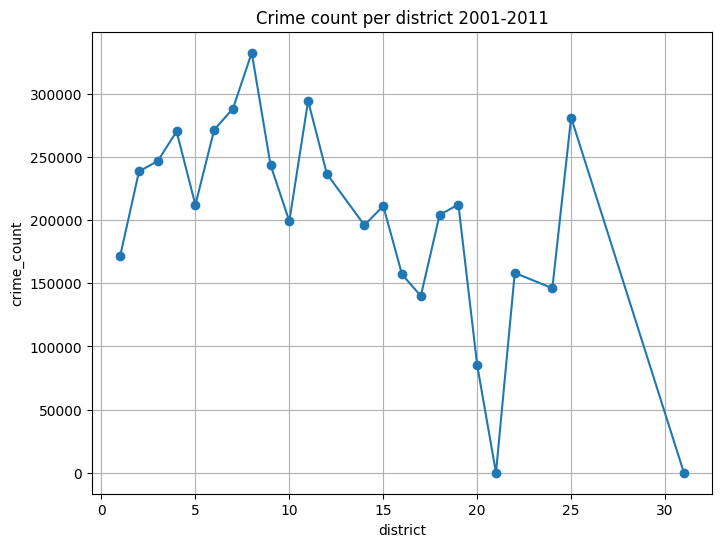

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(d_df_old.index, d_df_old['crime_count'], marker='o')
plt.ylabel('crime_count')
plt.xlabel('district')
plt.title('Crime count per district 2001-2011')
plt.grid(True)
plt.show()

In [13]:
d_df_old.shape

(24, 1)

## Wards (change every 10 years...)

In [14]:
df_3_before_14=df.query('Year < 2014').groupby("Ward").count()

In [15]:
w1_df=df_3_before_14[["ID"]].rename(columns={"ID" : "crime_count" })
#.sort_values(by="crime_count")
#w_df

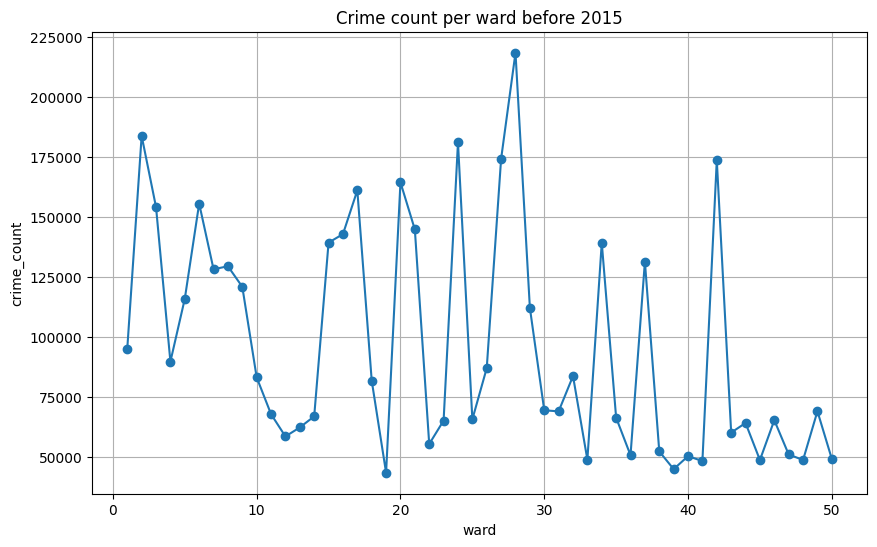

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(w1_df.index, w1_df['crime_count'], marker='o')
plt.ylabel('crime_count')
plt.xlabel('ward')
plt.title('Crime count per ward before 2015')
plt.grid(True)
plt.show()

In [17]:
w1_df.shape

(50, 1)

### from 2016 to 2021

In [18]:
df_3_16_to_21=df.query('2015 < Year < 2022').groupby("Ward").count()

In [19]:
w2_df=df_3_16_to_21[["ID"]].rename(columns={"ID" : "crime_count" })
#.sort_values(by="crime_count")
#w2_df

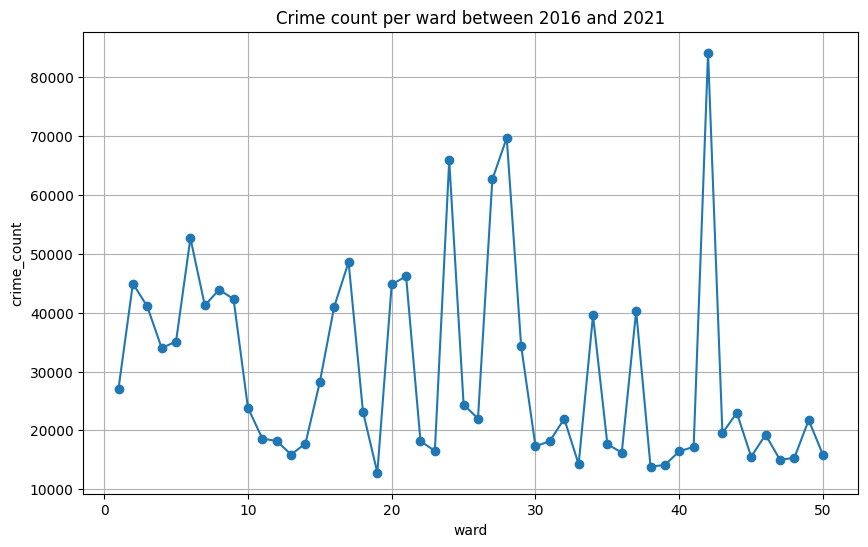

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(w2_df.index, w2_df['crime_count'], marker='o')
plt.ylabel('crime_count')
plt.xlabel('ward')
plt.title('Crime count per ward between 2016 and 2021')
plt.grid(True)
plt.show()

In [21]:
w2_df.shape

(50, 1)

### after 2022

In [22]:
df_3_after_22=df.query('Year > 2022').groupby("Ward").count()

In [23]:
w3_df=df_3_after_22[["ID"]].rename(columns={"ID" : "crime_count" })
#.sort_values(by="crime_count")
#w3_df

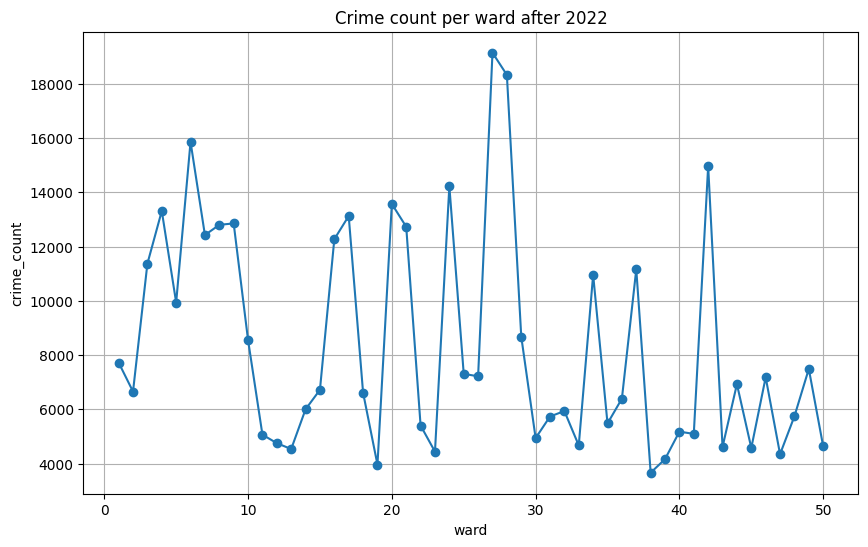

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(w3_df.index, w3_df['crime_count'], marker='o')
plt.ylabel('crime_count')
plt.xlabel('ward')
plt.title('Crime count per ward after 2022')
plt.grid(True)
plt.show()

In [25]:
w3_df.shape

(50, 1)

## Community areas (stable since 01)

In [26]:
df_4=df.groupby("Community Area").count()

In [27]:
df_4

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,FBI Code,Year,Updated On
Community Area,,,,,,,,,,,,,,,
0.0,76,76,76,76,76,76,76,76,76,76,76,73,76,76,76
1.0,116884,116884,116884,116884,116884,116884,116884,116660,116884,116884,116884,116867,116884,116884,116884
2.0,96999,96999,96999,96999,96999,96999,96999,96820,96999,96999,96998,96999,96999,96999,96999
3.0,111226,111226,111226,111226,111226,111226,111226,110853,111226,111226,111226,111226,111226,111226,111226
4.0,54128,54128,54128,54128,54128,54128,54128,53947,54128,54128,54128,54128,54128,54128,54128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73.0,89670,89670,89670,89670,89670,89670,89670,89487,89670,89670,89668,89670,89670,89670,89670
74.0,16821,16821,16821,16821,16821,16821,16821,16782,16821,16821,16821,16821,16821,16821,16821
75.0,59799,59799,59799,59799,59799,59799,59799,59696,59799,59799,59799,59799,59799,59799,59799


In [28]:
ca_df=df_4[["ID"]].rename(columns={"ID" : "crime_count" })
#.sort_values(by="crime_count")
#ca_df

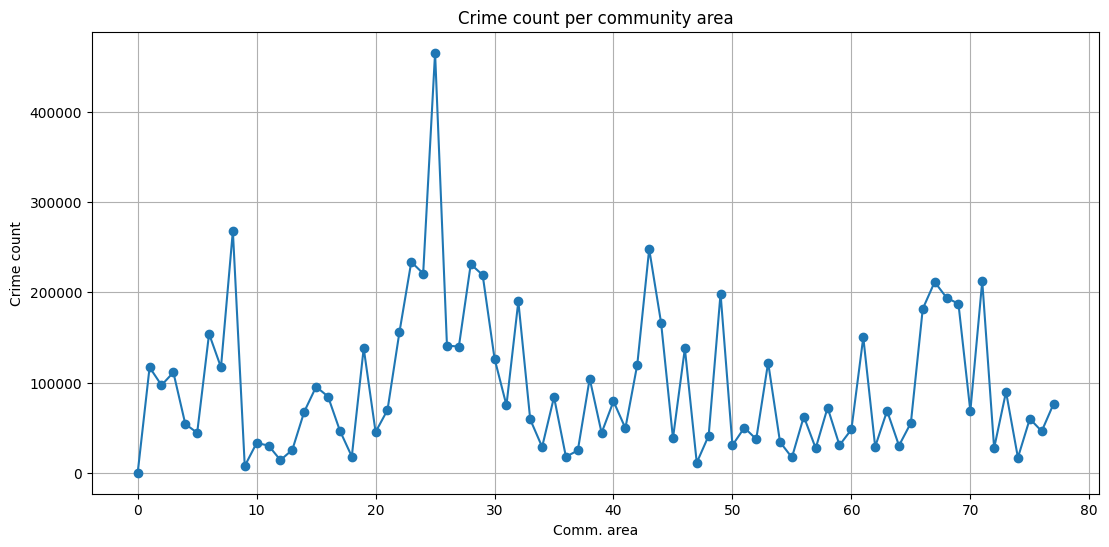

In [29]:
plt.figure(figsize=(13, 6))
plt.plot(ca_df.index, ca_df['crime_count'], marker='o')
plt.ylabel('Crime count')
plt.xlabel('Comm. area')
plt.title('Crime count per community area')
plt.grid(True)
plt.show()

In [30]:
ca_df.shape

(78, 1)

_NOTE_: __Washington Park__ is in ward 20, police district 2, community area 40 !

In [31]:
worst =  float(ca_df[ ca_df["crime_count"]==int(ca_df.max()[0]) ].index[0] )

/var/folders/_y/_w83gnx12c1brw3yy2nbv91m0000gn/T/ipykernel_78932/3090119019.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  worst =  float(ca_df[ ca_df["crime_count"]==int(ca_df.max()[0]) ].index[0] )


In [32]:
worst

25.0

In [33]:
print(f" The worst community area is Nr. {worst}!")

 The worst community area is Nr. 25.0!


# Further analysis:

In [34]:
df_25=df[df["Community Area"]==worst]

In [35]:
from datetime import datetime

def timer(t):
    return datetime.strptime(t, "%m/%d/%Y %I:%M:%S %p")

In [36]:
df.Date[0], timer(df.Date[0])

('03/18/2015 12:00:00 PM', datetime.datetime(2015, 3, 18, 12, 0))

In [37]:
df_25["Date_dt"]=df_25["Date"].apply(timer)

/var/folders/_y/_w83gnx12c1brw3yy2nbv91m0000gn/T/ipykernel_78932/3525700377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25["Date_dt"]=df_25["Date"].apply(timer)


In [38]:
df_25

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Updated On,Date_dt
9,11645833,JC213044,05/05/2012 12:25:00 PM,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,15.0,29.0,25.0,11,2012,04/06/2019 04:04:43 PM,2012-05-05 12:25:00
26,12010314,JD186932,03/15/2020 09:00:00 PM,051XX W HURON ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,15.0,37.0,25.0,08A,2020,03/22/2020 03:41:57 PM,2020-03-15 21:00:00
44,12057185,JD239952,05/22/2020 10:29:00 PM,0000X N LOREL AVE,2024,NARCOTICS,POSSESS - HEROIN (WHITE),STREET,True,False,15.0,28.0,25.0,18,2020,05/29/2020 03:41:25 PM,2020-05-22 22:29:00
72,12097474,JD287186,07/05/2020 05:18:00 PM,007XX N CENTRAL AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,True,True,15.0,29.0,25.0,08B,2020,09/07/2021 03:41:02 PM,2020-07-05 17:18:00
77,12038537,JD218490,04/27/2020 10:00:00 AM,048XX W HIRSCH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,25.0,37.0,25.0,11,2020,05/04/2020 03:42:21 PM,2020-04-27 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134772,12042648,JD222685,05/02/2020 10:27:00 PM,047XX W ERIE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,11.0,28.0,25.0,08B,2020,05/09/2020 03:41:55 PM,2020-05-02 22:27:00
8134796,12196989,JD403594,10/18/2020 06:19:00 PM,016XX N NASHVILLE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,25.0,29.0,25.0,14,2020,12/17/2020 03:40:05 PM,2020-10-18 18:19:00
8134821,12014082,JD191357,03/20/2020 03:08:00 PM,051XX W JACKSON BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,NURSING / RETIREMENT HOME,False,True,15.0,28.0,25.0,14,2020,03/27/2020 03:42:46 PM,2020-03-20 15:08:00
8134860,12198937,JD405737,10/15/2020 03:00:00 PM,021XX N HARLEM AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,False,False,25.0,29.0,25.0,14,2020,12/17/2020 03:40:05 PM,2020-10-15 15:00:00


In [39]:
ordered_df=df_25.sort_values(by="Date_dt", ascending=True).groupby("Year").count()

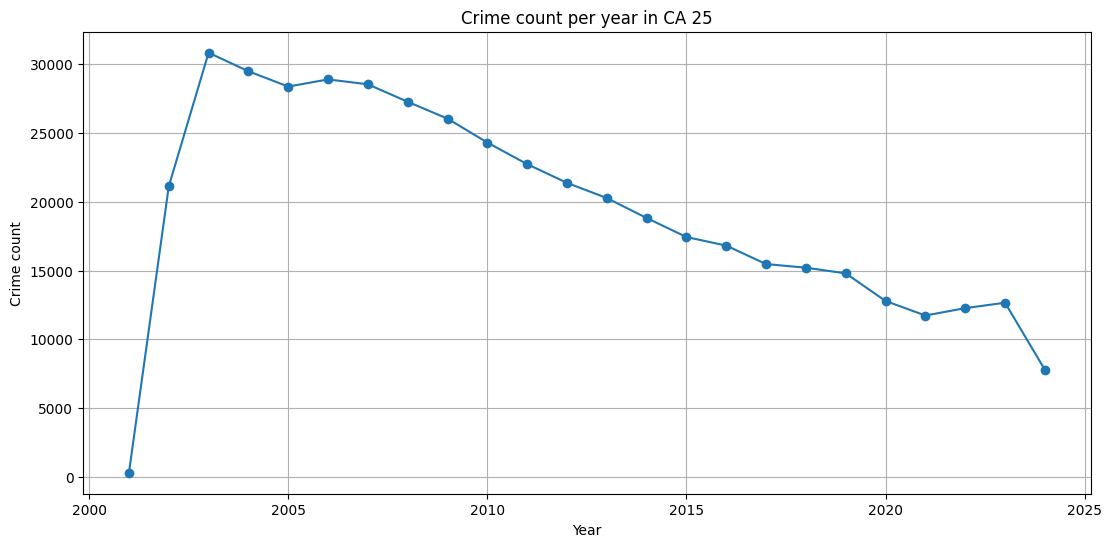

In [40]:
plt.figure(figsize=(13, 6))
plt.plot(ordered_df.index, ordered_df['ID'], marker='o')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.title('Crime count per year in CA 25')
plt.grid(True)
plt.show()

## monthly:

In [43]:
df_25["Y_M"]=df_25['Date_dt'].dt.to_period('M')

/var/folders/_y/_w83gnx12c1brw3yy2nbv91m0000gn/T/ipykernel_78932/620581492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25["Y_M"]=df_25['Date_dt'].dt.to_period('M')


In [44]:
df_25

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Updated On,Date_dt,Y_M
9,11645833,JC213044,05/05/2012 12:25:00 PM,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,15.0,29.0,25.0,11,2012,04/06/2019 04:04:43 PM,2012-05-05 12:25:00,2012-05
26,12010314,JD186932,03/15/2020 09:00:00 PM,051XX W HURON ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,15.0,37.0,25.0,08A,2020,03/22/2020 03:41:57 PM,2020-03-15 21:00:00,2020-03
44,12057185,JD239952,05/22/2020 10:29:00 PM,0000X N LOREL AVE,2024,NARCOTICS,POSSESS - HEROIN (WHITE),STREET,True,False,15.0,28.0,25.0,18,2020,05/29/2020 03:41:25 PM,2020-05-22 22:29:00,2020-05
72,12097474,JD287186,07/05/2020 05:18:00 PM,007XX N CENTRAL AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,True,True,15.0,29.0,25.0,08B,2020,09/07/2021 03:41:02 PM,2020-07-05 17:18:00,2020-07
77,12038537,JD218490,04/27/2020 10:00:00 AM,048XX W HIRSCH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,25.0,37.0,25.0,11,2020,05/04/2020 03:42:21 PM,2020-04-27 10:00:00,2020-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134772,12042648,JD222685,05/02/2020 10:27:00 PM,047XX W ERIE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,11.0,28.0,25.0,08B,2020,05/09/2020 03:41:55 PM,2020-05-02 22:27:00,2020-05
8134796,12196989,JD403594,10/18/2020 06:19:00 PM,016XX N NASHVILLE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,25.0,29.0,25.0,14,2020,12/17/2020 03:40:05 PM,2020-10-18 18:19:00,2020-10
8134821,12014082,JD191357,03/20/2020 03:08:00 PM,051XX W JACKSON BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,NURSING / RETIREMENT HOME,False,True,15.0,28.0,25.0,14,2020,03/27/2020 03:42:46 PM,2020-03-20 15:08:00,2020-03
8134860,12198937,JD405737,10/15/2020 03:00:00 PM,021XX N HARLEM AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,False,False,25.0,29.0,25.0,14,2020,12/17/2020 03:40:05 PM,2020-10-15 15:00:00,2020-10


In [50]:
ca25monthly_df=df_25.groupby("Y_M").count().rename(columns={"ID" : "crime_count" })[["crime_count"]]

In [53]:
ca25monthly_df

,crime_count
Y_M,
2001-01,33
2001-02,18
2001-03,16
2001-04,16
2001-05,16
...,...
2024-04,1017
2024-05,1101
2024-06,1225


<Axes: xlabel='Y_M'>

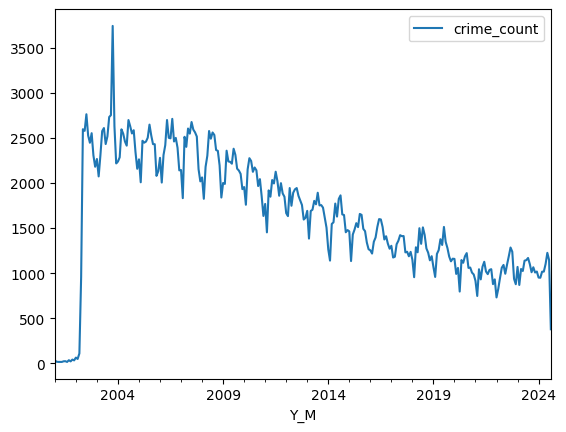

In [54]:
ca25monthly_df.plot()

## try linear regression with lag 12

In [60]:
train_size = 0.6
index = round(train_size*ca25monthly_df.shape[0])

df_train = ca25monthly_df.iloc[:index]
df_test = ca25monthly_df.iloc[index:]

In [62]:
for i in range(1, 13):
    df_train[f't - {i}'] = df_train['crime_count'].shift(i)
    df_test[f't - {i}'] = df_test['crime_count'].shift(i)

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

/var/folders/_y/_w83gnx12c1brw3yy2nbv91m0000gn/T/ipykernel_78932/3709616709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f't - {i}'] = df_train['crime_count'].shift(i)
/var/folders/_y/_w83gnx12c1brw3yy2nbv91m0000gn/T/ipykernel_78932/3709616709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[f't - {i}'] = df_test['crime_count'].shift(i)
/var/folders/_y/_w83gnx12c1brw3yy2nbv91m0000gn/T/ipykernel_78932/3709616709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [64]:
X_train = df_train.drop(columns = ['crime_count'])
y_train = df_train['crime_count']
X_test = df_test.drop(columns = ['crime_count'])
y_test = df_test['crime_count']

print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(146, 12) (146,) (90, 12) (90,)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

R2:  0.5067719307675405


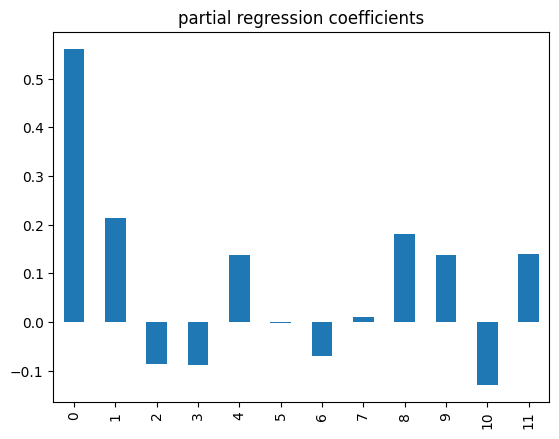

In [66]:
model = LinearRegression()
model = model.fit(X_train, y_train)

print('R2: ', r2_score(y_test, model.predict(X_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [67]:
y_pred=model.predict(X_test)
y_pred

array([1284.97781745, 1264.66032149, 1330.63529658, 1379.28236153,
       1392.18827887, 1378.85499207, 1350.93676111, 1261.84496991,
       1203.53209681, 1161.11740699, 1236.91124362, 1184.90030811,
       1059.14678127, 1234.05763616, 1298.68810233, 1393.82281986,
       1273.67856759, 1388.76352008, 1351.73330292, 1259.96931694,
       1115.36955733, 1135.68604961, 1211.51012463, 1101.54810625,
       1078.55656484, 1169.0285047 , 1345.16234481, 1312.29750107,
       1264.47021779, 1378.47810746, 1316.33620393, 1217.93934324,
       1083.55311604, 1126.62320804, 1168.26741986, 1142.17022341,
       1086.38841528, 1099.43501253, 1013.97254391, 1095.08212409,
       1166.98677329, 1166.73100171, 1149.43105568, 1100.79703968,
       1030.92321055,  987.91120866,  971.49761231,  898.44681041,
        881.39219798,  950.9541532 , 1036.48658664, 1036.19272557,
       1042.26657703, 1053.363674  ,  956.67360043,  970.68167669,
        970.00062506,  887.85296625,  903.33288544,  778.80712

<Axes: >

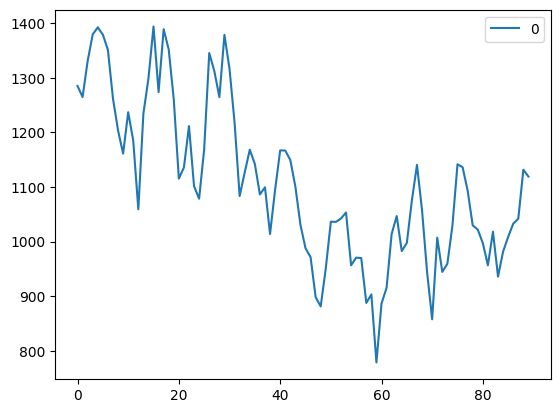

In [71]:
pd.DataFrame(y_pred).plot()

<Axes: xlabel='Y_M'>

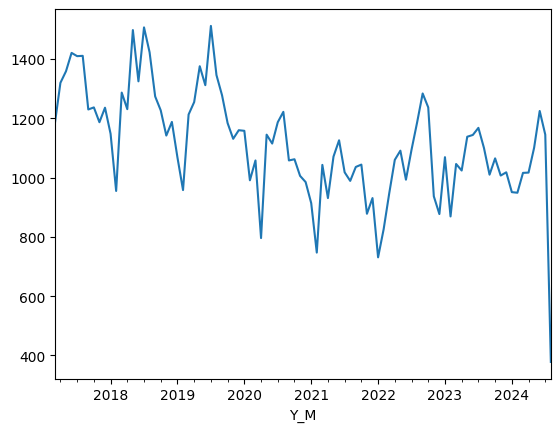

In [72]:
y_test.plot()

In [76]:
y_test[1:]

Y_M
2017-04    1320
2017-05    1359
2017-06    1421
2017-07    1410
2017-08    1411
           ... 
2024-04    1017
2024-05    1101
2024-06    1225
2024-07    1145
2024-08     378
Freq: M, Name: crime_count, Length: 89, dtype: int64

In [78]:
#stupid baseline:

y_stupid = df_test.shift(1)["crime_count"].dropna()
#y_true = df_test[1:]

print(f"R2: {r2_score(y_test[1:], y_stupid)}")

R2: 0.3348166697616085
